In [2]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Importing Data

In [21]:
df = pd.read_csv("C:\\Users\\suhas\\Documents\\College Projects\\Leaf-Classification-Medicinal\\features.csv")

In [22]:
del df['Unnamed: 0']
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,...,aspect ratio,form factor,rectangularity,narrow factor,perimeter ratio of diameter,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,pubescent bamboo,233.042456,64.064546,230.722686,70.439153,240.572296,42.356737,198395.0,3549.119297,1635.446899,...,10.006771,0.197924,1.347250,1.071749,2.024842,1.972960,12.639656,0.997666,1.688689,0.911738
1,pubescent bamboo,244.073543,45.414889,242.724323,49.847930,247.329901,32.024069,100889.5,2575.796025,1232.581543,...,10.205549,0.191088,1.475533,1.422046,1.469542,1.903264,8.137424,0.997191,1.193795,0.944818
2,pubescent bamboo,245.420139,43.430021,244.258054,48.248481,248.636254,29.024985,86552.0,2347.269114,1124.194702,...,10.068904,0.197406,1.450186,1.559150,1.339163,1.899323,8.553729,0.996610,0.848758,0.959023
3,pubescent bamboo,234.287985,61.532224,232.272938,67.075823,240.416826,43.685299,191065.5,2973.893566,1384.881470,...,6.922833,0.271482,1.449970,1.265659,1.696665,1.876360,8.440041,0.998419,1.673915,0.914331
4,pubescent bamboo,230.049934,66.982203,226.924000,74.989247,238.373617,44.929827,229856.0,3166.503738,1443.692261,...,5.463408,0.288075,1.659701,1.214101,1.806553,1.853990,8.641438,0.998568,1.968082,0.898644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,tangerine,184.260525,93.180342,168.806493,112.210285,215.297724,52.827481,705823.0,4336.717276,1818.690063,...,2.979133,0.471610,1.573011,0.963764,2.474182,1.785270,71.235251,0.993018,5.632665,0.670356
1903,tangerine,185.346329,90.126888,175.594804,102.609698,213.140058,54.705009,727647.0,4438.599526,1874.441284,...,2.943961,0.464129,1.640177,0.935099,2.532308,1.767558,44.850095,0.995506,5.516079,0.670101
1904,tangerine,195.946655,76.084667,178.265622,98.048714,221.792244,44.196328,739384.0,4241.036036,1767.615234,...,2.639542,0.516578,1.600946,0.991612,2.419594,1.740067,70.911466,0.990033,5.773773,0.652729
1905,tangerine,181.371278,95.293325,171.446218,107.993363,208.932923,60.204933,726846.0,4480.918286,1880.785767,...,2.898120,0.454902,1.679268,0.931945,2.556452,1.771287,65.832090,0.994308,5.591044,0.663269


### Pre-processing

In [24]:
le = LabelEncoder()

In [25]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [26]:
le.fit(y)
species = le.classes_

In [27]:
df['common name'] = le.transform(y)

In [28]:
df
a = set()
for i in range(len(df)):
    a.add(df.iloc[i]['common name'])
    
len(a)

32

### Splitting into Train and Test

In [31]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin)

### Create SVM and Optimise

In [32]:
clf = SVC()

In [33]:
params = {'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1, 5, 10], 'gamma': [0.01, 0.1, 1, 10]}

In [34]:
clf.fit(X_train, y_train)

SVC()

In [35]:
clf.score(X_test, y_test)

0.20964360587002095

In [36]:
gsc = GridSearchCV(clf, param_grid=params)

In [ ]:
grid_result = gsc.fit(X_train, y_train)

In [23]:
best_params = grid_result.best_params_


In [24]:
best_params

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [25]:
clf = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

In [26]:
#clf.fit(X_train, y_train)

In [27]:
#clf.score(X_test, y_test)

### Learning Curve

In [28]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_fin, y_fin, shuffle=True)

In [29]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean

array([1., 1., 1., 1., 1.])

In [30]:
test_scores_mean = test_scores.mean(axis = 1)
test_scores_mean

array([0.49273707, 0.78288205, 0.84354232, 0.87918103, 0.90482171])

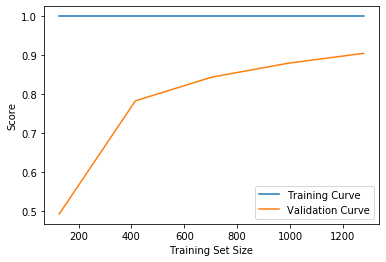

In [31]:
plt.plot(train_sizes, train_scores_mean, label='Training Curve')
plt.plot(train_sizes, test_scores_mean, label = 'Validation Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()

In [32]:
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
clf.score(X_test, y_test)

0.8925